In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
#train-test generation
df= pd.read_csv('customer_churn_dataset-training-master.csv') #Used for training, splits and overall model building

#training_df head
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


### Because we have columns with non-float data, we will label all of them as floats.



In [47]:
#label encoding for categorization into floats
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
corr_matrix = df.corr()

### Let's visualize the distribution of data in the columns

ValueError: num must be an integer with 1 <= num <= 9, not 10

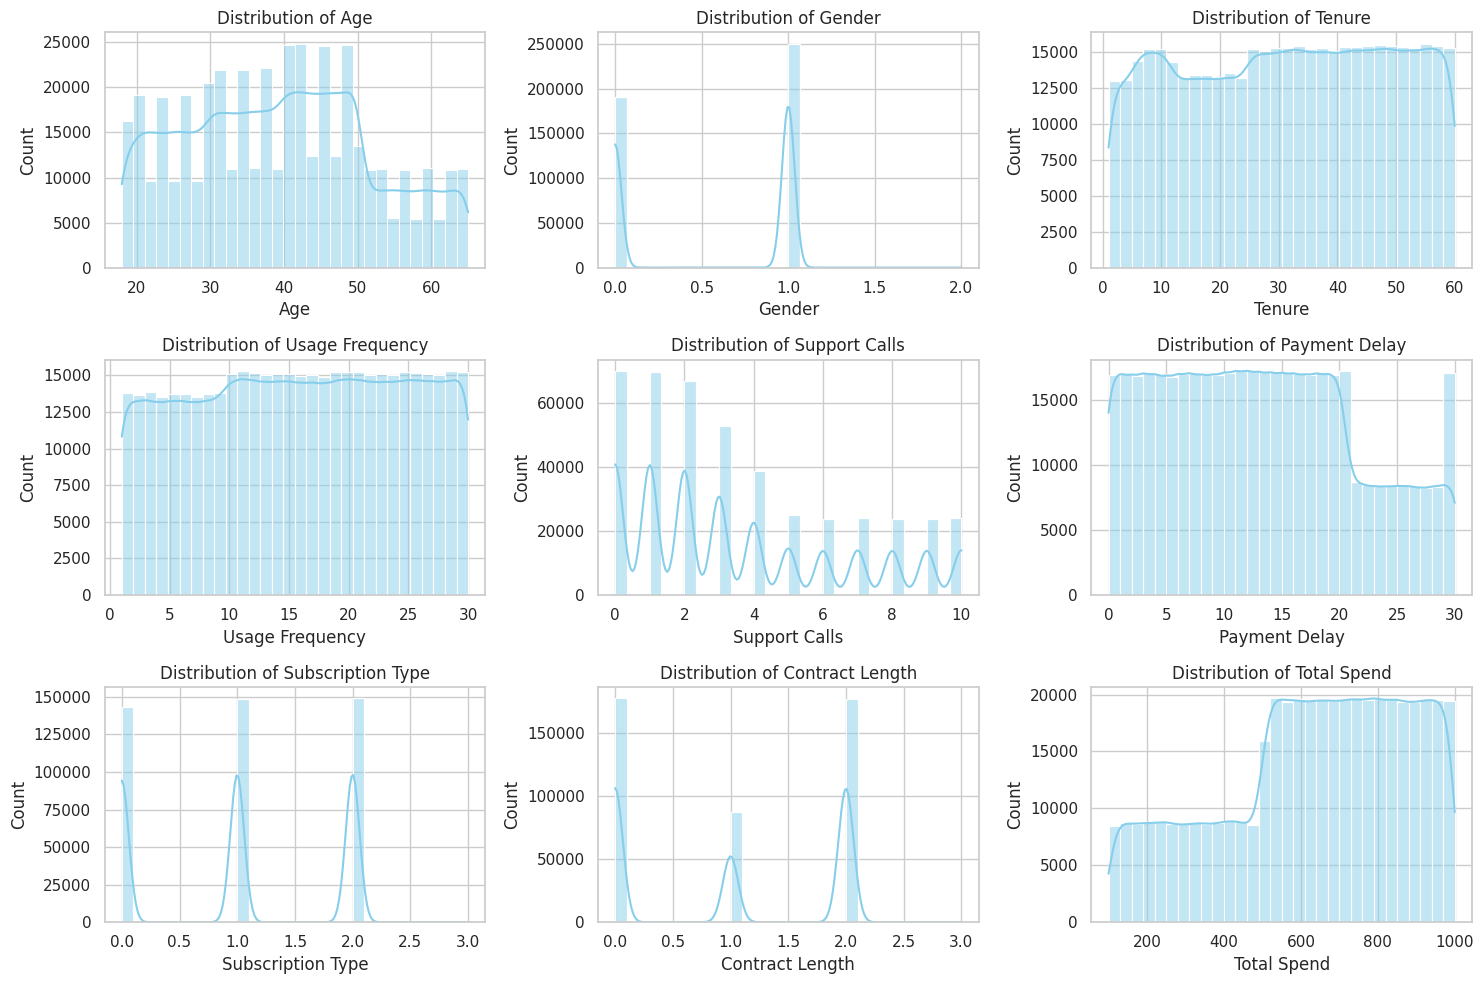

In [48]:
#Plot column-data distribution
pldf= df.drop(['CustomerID'], axis=1)
numeric_columns = pldf.select_dtypes(include=[float, int]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(pldf[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

### We can visualize how the columns are relevant to churn: correlation. This step is important

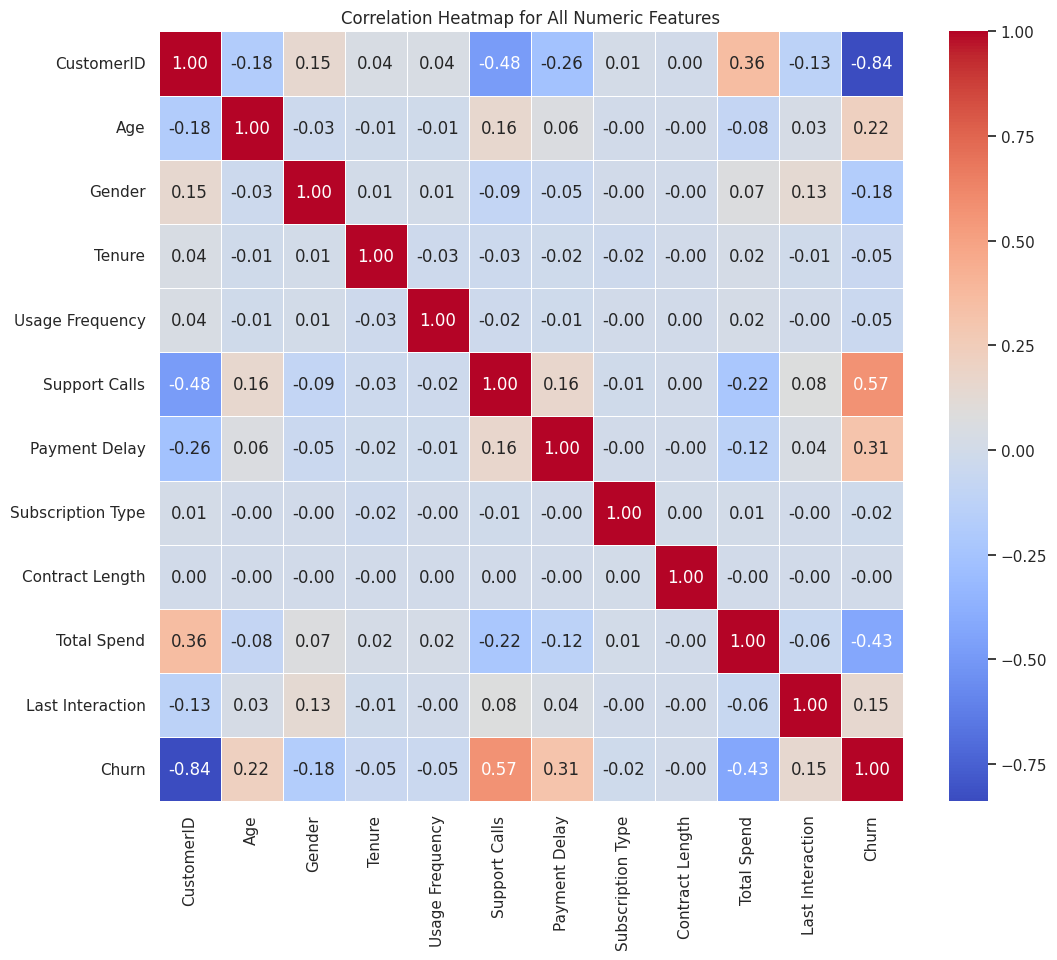

In [50]:
#Using Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for All Numeric Features")
plt.show()

### So we can see the most relevant features are:

In [55]:
#Filtering out most relevant features
f= corr_matrix.index[abs(corr_matrix['Churn'])>0.2].to_list()
print(f)

['CustomerID', 'Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Churn']


### Checking how Churn positives(1), and negatives(0) are distributed.

<ipython-input-56-4957b73204c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


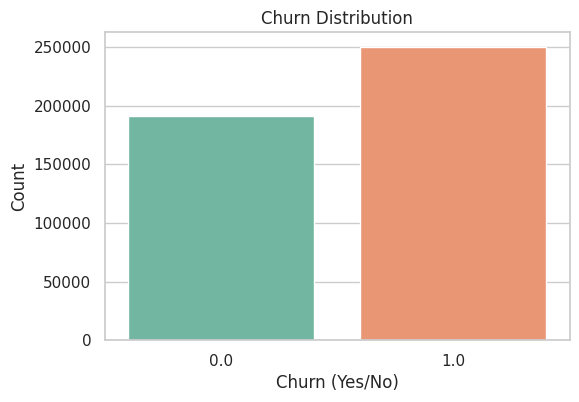

In [56]:
# Plot to visualize Churn distribution: 0, 1
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()

Though teh Churn-distribution doesn't seem equal, it's decent and can be applied to build ML models with no further expansion or sampling

### Visualizing how Churn and the data of columns are mutually related

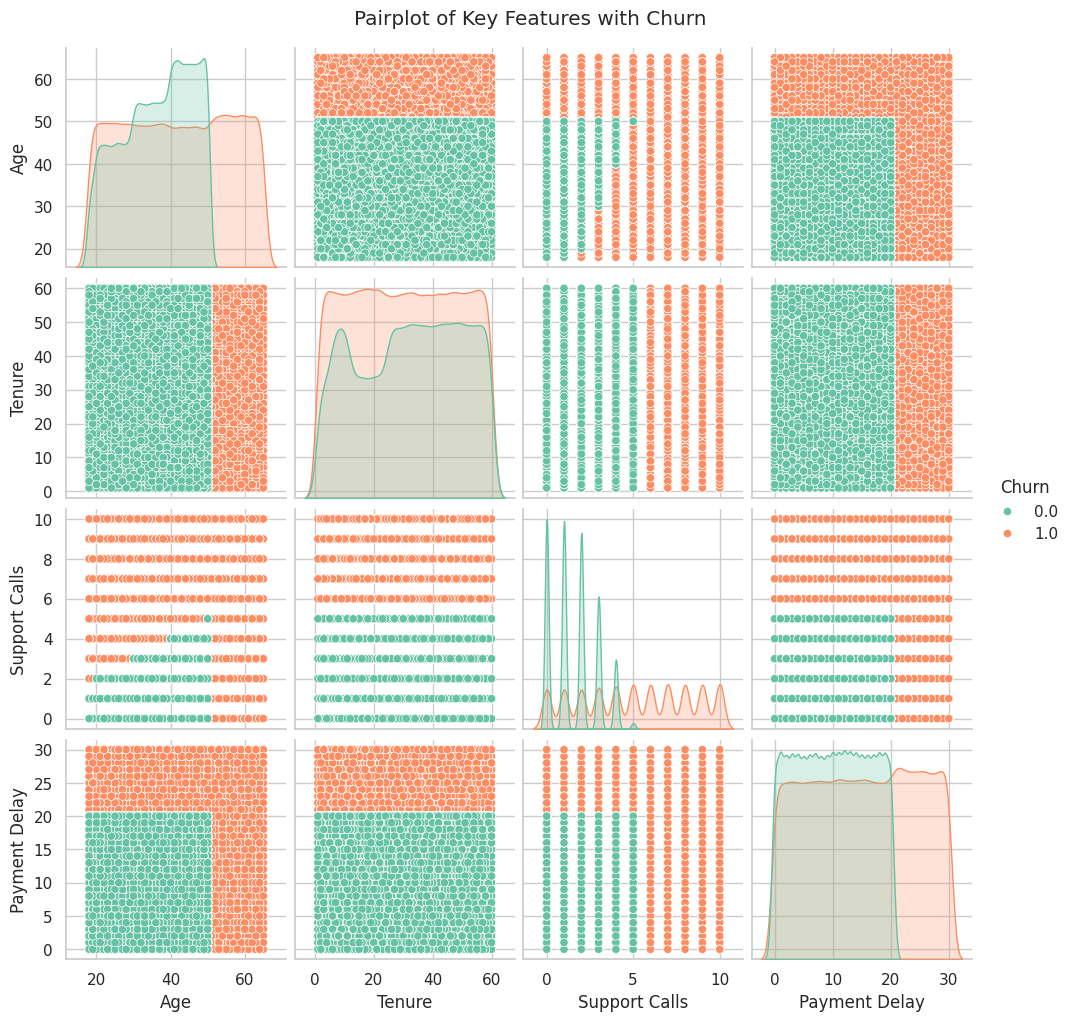

In [44]:

key_columns = ['Age', 'Tenure', 'Support Calls', 'Payment Delay']


sns.pairplot(df[key_columns + ['Churn']], hue='Churn', palette='Set2')
plt.suptitle('Pairplot of Key Features with Churn', y=1.02)
plt.show()
